## Kalman demo1 

basic Python implementation of a Kalman Filter for a simple imaginary problem: estimating the position of a moving object, assuming noisy measurements.

The object moves in one dimension with a constant velocity. You are trying to estimate its position using noisy sensor measurements.

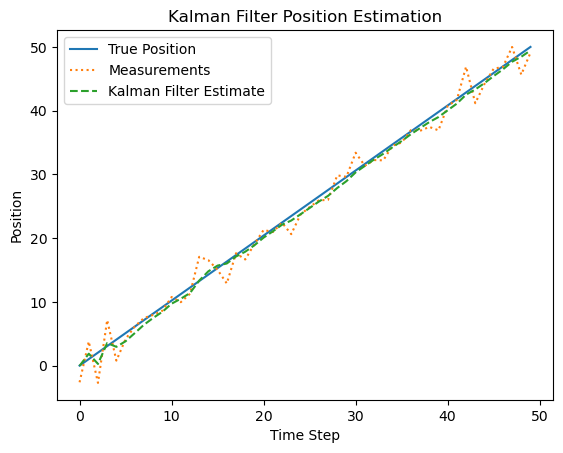

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
dt = 1  # Time step (1 second)
var_process = 1e-5  # Process variance (how much we trust our motion model)
var_measurement = 5  # Measurement variance (sensor noise)

# State Transition matrix (A)
A = np.array([[1, dt], 
              [0, 1]])  # Accounts for position and velocity

# Measurement matrix (H)
H = np.array([[1, 0]])  # We can only measure the position

# Process noise covariance (Q)
Q = np.array([[var_process, 0], 
              [0, var_process]])

# Measurement noise covariance (R)
R = np.array([[var_measurement]])

# Initial state estimate (position = 0, velocity = 1)
x = np.array([[0], 
              [1]])

# Initial uncertainty covariance matrix (P)
P = np.array([[1, 0], 
              [0, 1]])

# Simulate noisy sensor data (true position + noise)
num_steps = 50
true_position = np.linspace(0, num_steps, num_steps)  # True position (moving at 1 m/s)
measurements = true_position + np.random.normal(0, var_measurement**0.5, num_steps)  # Noisy sensor data

# Lists to store the estimates
estimates = []

# Kalman Filter Process
for z in measurements:
    # Prediction step
    x = A @ x  # Predict the state
    P = A @ P @ A.T + Q  # Predict the uncertainty

    # Measurement update step (Correction)
    z = np.array([[z]])  # Measurement
    y = z - H @ x  # Measurement residual
    S = H @ P @ H.T + R  # Residual covariance
    K = P @ H.T @ np.linalg.inv(S)  # Kalman gain

    # Update the state estimate and covariance matrix
    x = x + K @ y
    P = (np.eye(2) - K @ H) @ P

    # Store the position estimate
    estimates.append(x[0, 0])

# Plot the results
plt.plot(true_position, label='True Position')
plt.plot(measurements, label='Measurements', linestyle='dotted')
plt.plot(estimates, label='Kalman Filter Estimate', linestyle='--')
plt.legend()
plt.xlabel('Time Step')
plt.ylabel('Position')
plt.title('Kalman Filter Position Estimation')
plt.show()


### using filterpy library



* use https://github.com/rlabbe/filterpy

pip install filterpy

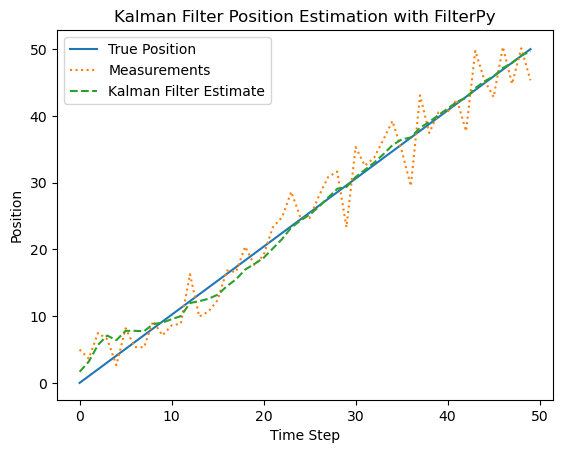

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise

# Define the parameters
dt = 1  # Time step (1 second)
var_process = 1e-5  # Process variance (process noise)
var_measurement = 10  # Measurement variance (sensor noise)

# Create the Kalman Filter object
kf = KalmanFilter(dim_x=2, dim_z=1)

# Initial state [position, velocity]
kf.x = np.array([[0.],  # Initial position
                 [1.]])  # Initial velocity

# State Transition matrix (A)
kf.F = np.array([[1, dt], 
                 [0, 1]])  # Models position and velocity update

# Measurement function (H)
kf.H = np.array([[1, 0]])  # We only measure position

# Measurement noise covariance (R)
kf.R = np.array([[var_measurement]])  # Measurement noise

# Process noise covariance (Q)
kf.Q = Q_discrete_white_noise(dim=2, dt=dt, var=var_process)

# Initial uncertainty in the state estimate (P)
kf.P = np.array([[1, 0], 
                 [0, 1]])

# Simulate noisy sensor data (true position + noise)
num_steps = 50
true_position = np.linspace(0, num_steps, num_steps)  # True position (moving at 1 m/s)
measurements = true_position + np.random.normal(0, var_measurement**0.5, num_steps)  # Noisy sensor data

# Lists to store the estimates
estimates = []

# Kalman Filter Process
for z in measurements:
    # Prediction step
    kf.predict()

    # Measurement update step (Correction)
    kf.update([[z]])

    # Store the position estimate
    estimates.append(kf.x[0, 0])

# Plot the results
plt.plot(true_position, label='True Position')
plt.plot(measurements, label='Measurements', linestyle='dotted')
plt.plot(estimates, label='Kalman Filter Estimate', linestyle='--')
plt.legend()
plt.xlabel('Time Step')
plt.ylabel('Position')
plt.title('Kalman Filter Position Estimation with FilterPy')
plt.show()
